In [134]:
# libraries
import pandas as pd
import numpy as np
import datetime as dt
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
# load dataframe
activities = pd.read_csv("data/activities.csv")
# print(activties.head())

In [137]:
# sub-selection of columns
acti = activities[["Aktivitätsdatum", "Name der Aktivität", "Aktivitätsart", "Verstrichene Zeit", "Distanz", "Max. Herzfrequenz", "Höhenzunahme", "Max. Steigung", "Durchschnittliche Watt", "Kalorien"]]

# renaming columns - English
acti = acti.rename(columns={"Aktivitätsdatum": "date", "Name der Aktivität": "name", "Aktivitätsart": "activity", "Verstrichene Zeit": "time", "Distanz": "distance", "Max. Herzfrequenz": "max_heartrate", "Höhenzunahme": "elevation", "Max. Steigung": "max_gradient", "Durchschnittliche Watt": "avg_watts", "Kalorien": "calories"})

# adjusting / adding date columns
acti['date'] = pd.to_datetime(acti['date'], format="%d.%m.%Y, %H:%M:%S").dt.date
acti['year'] = pd.DatetimeIndex(acti['date']).year
acti['month'] = pd.DatetimeIndex(acti['date']).month
acti['time_minutes'] = round(acti['time']/60, 2)
acti['time_hours'] = round(acti['time']/3600, 2)

# distance as number
acti['distance'] = acti['distance'].str.replace(',','.')
acti['distance'] = pd.to_numeric(acti['distance'], downcast="integer")

# print(acti.head())
# print(acti.info())

In [138]:
# set value that selects the amount of top results
top_value = 10

In [139]:
# top activities based on distance
distance = acti[["date", "name", "activity", "distance"]]
distance = distance[distance["activity"] != 'Schwimmen'] # Exclude 'Schwimmen' because the tracked distance was wrong
sorted_distance = distance.sort_values(by=['distance'], ascending=False)
top_distance = sorted_distance.head(top_value)
top_distance

,date,name,activity,distance
223,2021-05-09,Wattwanderung am Ith,Radfahrt,158.33
517,2022-03-19,Fahrt am Morgen,Radfahrt,128.34
292,2021-09-04,Mittagsradfahrt,Radfahrt,125.11
531,2022-03-27,Mittagsradfahrt,Radfahrt,116.78
46,2020-08-15,Radfahren,Radfahrt,110.74
264,2021-07-17,Mittagsradfahrt,Radfahrt,104.12
273,2021-08-15,Fahrt am Morgen,Radfahrt,100.60
559,2022-05-01,Eschborn - Frankfurt (- Eschborn),Radfahrt,98.70
95,2020-11-07,Hallo Tschüss 👋,Radfahrt,89.58
29,2020-04-19,Mittagsradfahrt,Radfahrt,88.80


In [140]:
# top activities based on elevation
elevation = acti[["date", "name", "activity", "elevation"]]
sorted_elevation = elevation.sort_values(by=['elevation'], ascending=False)
top_elevation = sorted_elevation.head(top_value)
top_elevation

,date,name,activity,elevation
559,2022-05-01,Eschborn - Frankfurt (- Eschborn),Radfahrt,1609.0
140,2021-01-16,TDZ Stage 3: Long Ride,Virtuelle Radfahrt,1243.0
517,2022-03-19,Fahrt am Morgen,Radfahrt,1231.0
508,2022-03-12,Zwift - Yellow Unicorn on Tour of Fire and Ice...,Virtuelle Radfahrt,1174.0
223,2021-05-09,Wattwanderung am Ith,Radfahrt,1131.0
284,2021-08-26,Fahrt am Morgen,Radfahrt,1124.0
95,2020-11-07,Hallo Tschüss 👋,Radfahrt,1113.0
87,2020-10-26,FTP Builder - Foundation,Virtuelle Radfahrt,1062.0
256,2021-06-29,Watopia,Virtuelle Radfahrt,1058.0
484,2022-02-11,Zwift - The Long Ride,Virtuelle Radfahrt,858.0


In [141]:
# top activities based on max_heartrate
max_heartrate = acti[["date", "name", "activity", "max_heartrate"]]
sorted_max_heartrate = max_heartrate.sort_values(by=['max_heartrate'], ascending=False)
top_max_heartrate = sorted_max_heartrate.head(top_value)
top_max_heartrate

,date,name,activity,max_heartrate
20,2020-07-05,Fahrt am Nachmittag,Radfahrt,195.0
153,2021-02-07,Florian 000's Meetup,Virtuelle Radfahrt,194.0
21,2020-07-07,Fahrt am Nachmittag,Radfahrt,194.0
151,2021-02-05,Florian 000's Meetup,Virtuelle Radfahrt,193.0
95,2020-11-07,Hallo Tschüss 👋,Radfahrt,193.0
490,2022-02-20,Zwift - FTP Test on Tempus Fugit in Watopia,Virtuelle Radfahrt,193.0
192,2021-04-07,TOW Stage 2: Standard Ride,Virtuelle Radfahrt,193.0
131,2021-01-06,TDZ Stage 1: Standard Ride,Virtuelle Radfahrt,192.0
16,2020-06-23,Abendradfahrt,Radfahrt,192.0
559,2022-05-01,Eschborn - Frankfurt (- Eschborn),Radfahrt,191.0


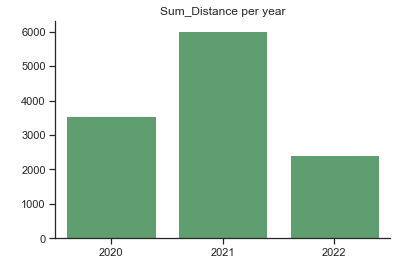

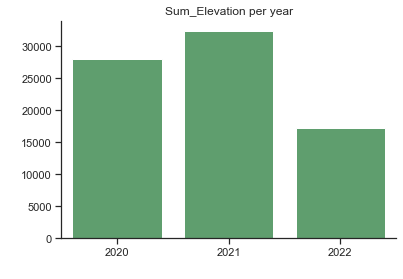

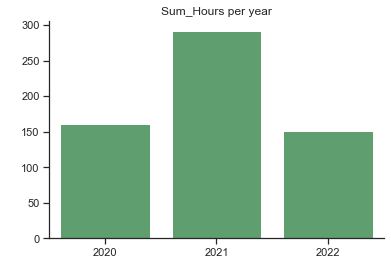

<Figure size 432x288 with 0 Axes>

In [143]:
# bike rides data frame
bike_rides = acti[acti['activity'].isin(["Radfahrt", "Virtuelle Radfahrt"])]

# create grouped data frame
bike_rides_by_year = bike_rides.groupby('year').agg(sum_distance = ('distance','sum'), sum_elevation = ('elevation', 'sum'), sum_hours = ('time_hours', 'sum')).reset_index()
# print(bike_rides_by_year.info())

sns.set(font='Helvetica')
sns.set_style("ticks")

for column in bike_rides_by_year:
    # print(column)
    if (column == "year"):
        continue
    else:
        sns.barplot(x=bike_rides_by_year["year"], y=bike_rides_by_year[column], color = 'g')
        plt.title(column.title() + " per year")
        plt.xlabel(" ")
        plt.ylabel(" ")
        sns.despine()
        plt.show()
        plt.clf()

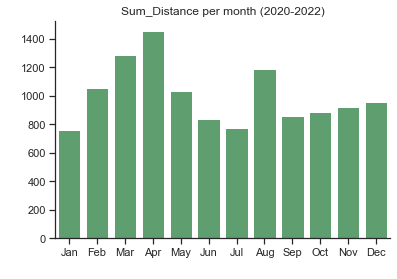

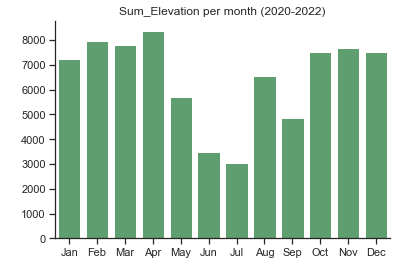

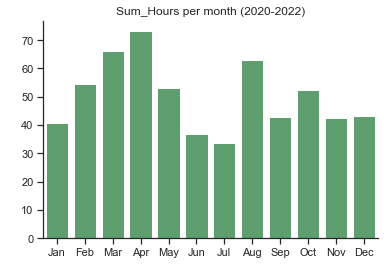

<Figure size 432x288 with 0 Axes>

In [144]:
# create grouped data frame
bike_rides_by_month = bike_rides.groupby('month').agg(sum_distance = ('distance','sum'), sum_elevation = ('elevation', 'sum'), sum_hours = ('time_hours', 'sum')).reset_index()
bike_rides_by_month['month_name'] = bike_rides_by_month['month'].apply(lambda x: calendar.month_abbr[x])
# print(bike_rides_by_month.head())

sns.set(font='Helvetica')
sns.set_style("ticks")

for column in bike_rides_by_month:
    # print(column)
    if (column == 'month' or column == 'month_name'):
        continue
    else:
        sns.barplot(x=bike_rides_by_month['month_name'], y=bike_rides_by_month[column], color = 'g')
        plt.title(column.title() + ' per month (2020-2022)')
        plt.xlabel(' ')
        plt.ylabel(' ')
        sns.despine()
        plt.show()
        plt.clf()